# 第11章 时间序列

## 11.1 日期和时间数据的类型及工具

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2020, 1, 27, 21, 15, 40, 900852)

In [5]:
now.year, now.month, now.day

(2020, 1, 27)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [8]:
delta

datetime.timedelta(days=926, seconds=56700)

In [9]:
delta.days

926

In [10]:
delta.seconds

56700

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2011, 1, 7)

In [13]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1 字符串与datetime互相转换

In [15]:
stamp = datetime(2011, 1, 3)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [18]:
value = '2011-01-03'

In [19]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011', '8/6/2011']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [27]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [28]:
idx = pd.to_datetime(datestrs + [None])

In [29]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [30]:
idx[2]

NaT

In [31]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 时间序列基础

In [33]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [34]:
ts = pd.Series(np.random.randn(6), index=dates)

In [35]:
ts

2011-01-02    0.656055
2011-01-05    0.021632
2011-01-07    0.496684
2011-01-08   -0.134648
2011-01-10    0.675680
2011-01-12   -1.754689
dtype: float64

In [36]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [37]:
ts + ts[::2]

2011-01-02    1.312109
2011-01-05         NaN
2011-01-07    0.993368
2011-01-08         NaN
2011-01-10    1.351360
2011-01-12         NaN
dtype: float64

In [38]:
ts.index.dtype

dtype('<M8[ns]')

In [39]:
stamp = ts.index[0]

In [40]:
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 索引、选择、子集

In [41]:
stamp = ts.index[2]

In [42]:
ts[stamp]

0.49668376676098036

In [43]:
ts['1/10/2011']

0.6756801436340959

In [44]:
ts['20110110']

0.6756801436340959

In [45]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [46]:
longer_ts

2000-01-01   -0.872989
2000-01-02   -1.061396
2000-01-03   -1.312847
2000-01-04    0.006504
2000-01-05    0.672836
                ...   
2002-09-22   -0.640731
2002-09-23    0.422243
2002-09-24    1.229786
2002-09-25    0.636252
2002-09-26    0.014544
Freq: D, Length: 1000, dtype: float64

In [47]:
longer_ts['2001']

2001-01-01    0.520512
2001-01-02    0.607357
2001-01-03    1.780041
2001-01-04    1.638534
2001-01-05    1.461857
                ...   
2001-12-27   -0.403761
2001-12-28    0.248781
2001-12-29    0.587694
2001-12-30    0.617510
2001-12-31    1.855074
Freq: D, Length: 365, dtype: float64

In [48]:
longer_ts['2001-05']

2001-05-01   -0.946360
2001-05-02   -2.161988
2001-05-03   -1.123269
2001-05-04    1.814205
2001-05-05   -2.008262
2001-05-06    1.423102
2001-05-07   -0.430700
2001-05-08   -0.601488
2001-05-09    0.668665
2001-05-10   -1.798526
2001-05-11   -0.484525
2001-05-12    1.953977
2001-05-13    0.133365
2001-05-14    0.294198
2001-05-15    1.274574
2001-05-16    1.740315
2001-05-17   -0.771780
2001-05-18    0.729675
2001-05-19    0.118547
2001-05-20   -1.881702
2001-05-21    0.659572
2001-05-22    0.593593
2001-05-23    0.323554
2001-05-24    0.892611
2001-05-25   -0.582586
2001-05-26    0.031077
2001-05-27   -2.145184
2001-05-28   -0.472012
2001-05-29   -0.443893
2001-05-30   -1.280020
2001-05-31    1.442828
Freq: D, dtype: float64

In [49]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.496684
2011-01-08   -0.134648
2011-01-10    0.675680
2011-01-12   -1.754689
dtype: float64

In [50]:
ts

2011-01-02    0.656055
2011-01-05    0.021632
2011-01-07    0.496684
2011-01-08   -0.134648
2011-01-10    0.675680
2011-01-12   -1.754689
dtype: float64

In [51]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.496684
2011-01-08   -0.134648
2011-01-10    0.675680
dtype: float64

In [52]:
ts.truncate(after='1/9/2011')

2011-01-02    0.656055
2011-01-05    0.021632
2011-01-07    0.496684
2011-01-08   -0.134648
dtype: float64

In [53]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [54]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [55]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.280082,0.148427,-0.961016,-1.351874
2001-05-09,0.327883,0.257178,-0.163588,0.338953
2001-05-16,0.028364,1.654621,-0.580897,0.593417
2001-05-23,1.015967,0.442324,-2.078780,-1.402924
2001-05-30,1.165280,-0.422947,1.365873,-1.441068


### 11.2.2 含有重复索引的时间序列

In [56]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [57]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [58]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [59]:
dup_ts.index.is_unique

False

In [60]:
dup_ts['1/3/2000']

4

In [61]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [62]:
grouped = dup_ts.groupby(level=0)

In [63]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [64]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期范围、频率和移位

In [65]:
ts

2011-01-02    0.656055
2011-01-05    0.021632
2011-01-07    0.496684
2011-01-08   -0.134648
2011-01-10    0.675680
2011-01-12   -1.754689
dtype: float64

In [66]:
resampler = ts.resample('D')

### 11.3.1 生成日期范围

In [67]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [68]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [69]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 频率和日期偏置

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()

In [76]:
hour

<Hour>

In [77]:
four_hours = Hour(4)

In [78]:
four_hours

<4 * Hours>

In [79]:
pd.date_range('2000-01-01', '2001-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', length=2214, freq='4H')

In [80]:
Hour(2) + Minute(30)

<150 * Minutes>

In [81]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 11.3.2.1 月中某星期的日期

In [82]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [83]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3 移位（前向和后向）日期

In [84]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [85]:
ts

2000-01-31    1.298890
2000-02-29    0.287532
2000-03-31    0.808211
2000-04-30   -1.109851
Freq: M, dtype: float64

In [86]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.298890
2000-04-30    0.287532
Freq: M, dtype: float64

In [87]:
ts.shift(-2)

2000-01-31    0.808211
2000-02-29   -1.109851
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [88]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.778632
2000-03-31    1.810854
2000-04-30   -2.373219
Freq: M, dtype: float64

In [89]:
ts.shift(2, freq='M')

2000-03-31    1.298890
2000-04-30    0.287532
2000-05-31    0.808211
2000-06-30   -1.109851
Freq: M, dtype: float64

In [90]:
ts.shift(3, freq='D')

2000-02-03    1.298890
2000-03-03    0.287532
2000-04-03    0.808211
2000-05-03   -1.109851
dtype: float64

In [91]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.298890
2000-02-29 01:30:00    0.287532
2000-03-31 01:30:00    0.808211
2000-04-30 01:30:00   -1.109851
Freq: M, dtype: float64

#### 11.3.3.1 使用偏置进行移位日期

In [92]:
from pandas.tseries.offsets import Day, MonthEnd

In [93]:
now = datetime(2011, 11, 17)

In [94]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [95]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [96]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [97]:
offset = MonthEnd()

In [98]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [99]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [100]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [101]:
ts

2000-01-15   -1.898146
2000-01-19    0.849218
2000-01-23    0.391826
2000-01-27    0.083312
2000-01-31    0.255830
2000-02-04   -1.730243
2000-02-08   -1.367656
2000-02-12   -0.319285
2000-02-16   -0.997440
2000-02-20   -0.628972
2000-02-24   -1.359090
2000-02-28   -0.899897
2000-03-03    0.225889
2000-03-07   -0.403297
2000-03-11   -0.223722
2000-03-15   -0.159888
2000-03-19    0.495507
2000-03-23    0.262185
2000-03-27   -1.349379
2000-03-31    0.861020
Freq: 4D, dtype: float64

In [102]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.063592
2000-02-29   -1.043226
2000-03-31   -0.036461
dtype: float64

In [103]:
ts.resample('M').mean()

2000-01-31   -0.063592
2000-02-29   -1.043226
2000-03-31   -0.036461
Freq: M, dtype: float64

## 11.4 时区处理

In [104]:
import pytz

In [105]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [106]:
tz = pytz.timezone('America/New_York')

In [107]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1 时区的本地化和转换

In [108]:
rng = pd.date_range('3/9/2012 9:30', periods=5, freq='D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [110]:
ts

2012-03-09 09:30:00   -1.679139
2012-03-10 09:30:00    0.840474
2012-03-11 09:30:00   -1.031356
2012-03-12 09:30:00   -0.029649
2012-03-13 09:30:00   -1.532895
Freq: D, dtype: float64

In [111]:
print(ts.index.tz)

None


In [112]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [113]:
ts

2012-03-09 09:30:00   -1.679139
2012-03-10 09:30:00    0.840474
2012-03-11 09:30:00   -1.031356
2012-03-12 09:30:00   -0.029649
2012-03-13 09:30:00   -1.532895
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-09 09:30:00+00:00   -1.679139
2012-03-10 09:30:00+00:00    0.840474
2012-03-11 09:30:00+00:00   -1.031356
2012-03-12 09:30:00+00:00   -0.029649
2012-03-13 09:30:00+00:00   -1.532895
Freq: D, dtype: float64

In [116]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [117]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.679139
2012-03-10 04:30:00-05:00    0.840474
2012-03-11 05:30:00-04:00   -1.031356
2012-03-12 05:30:00-04:00   -0.029649
2012-03-13 05:30:00-04:00   -1.532895
Freq: D, dtype: float64

In [118]:
ts_eastern = ts.tz_localize('America/New_York')

In [119]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.679139
2012-03-10 14:30:00+00:00    0.840474
2012-03-11 13:30:00+00:00   -1.031356
2012-03-12 13:30:00+00:00   -0.029649
2012-03-13 13:30:00+00:00   -1.532895
Freq: D, dtype: float64

In [120]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.679139
2012-03-10 15:30:00+01:00    0.840474
2012-03-11 14:30:00+01:00   -1.031356
2012-03-12 14:30:00+01:00   -0.029649
2012-03-13 14:30:00+01:00   -1.532895
Freq: D, dtype: float64

In [121]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 11.4.2 时区感知时间戳对象的操作

In [122]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [123]:
stamp_utc = stamp.tz_localize('utc')

In [124]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [125]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [126]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [127]:
stamp_utc.value

1299902400000000000

In [128]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [129]:
from pandas.tseries.offsets import Hour

In [130]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [131]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [132]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [133]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [134]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [135]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 11.4.3 不同时区间的操作

In [136]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [137]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [138]:
ts

2012-03-07 09:30:00   -1.108642
2012-03-08 09:30:00    1.755477
2012-03-09 09:30:00    0.458801
2012-03-12 09:30:00    2.131483
2012-03-13 09:30:00    1.038549
2012-03-14 09:30:00    0.472876
2012-03-15 09:30:00    0.154208
2012-03-16 09:30:00    0.596802
2012-03-19 09:30:00    0.737209
2012-03-20 09:30:00   -0.107250
Freq: B, dtype: float64

In [139]:
ts1 = ts[:7].tz_localize('Europe/London')

In [140]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [141]:
result = ts1 + ts2

In [142]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 时间区间和区间算术

In [143]:
p = pd.Period(2007, freq='A-DEC')

In [144]:
p

Period('2007', 'A-DEC')

In [145]:
p + 5

Period('2012', 'A-DEC')

In [146]:
p - 2

Period('2005', 'A-DEC')

In [147]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [148]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [149]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [150]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.284008
2000-02    0.819382
2000-03   -0.146108
2000-04   -0.366433
2000-05   -0.114070
2000-06   -0.434235
Freq: M, dtype: float64

In [154]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [155]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [156]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 11.5.1 区间频率转换

In [157]:
p = pd.Period('2007', freq='A-DEC')

In [158]:
p

Period('2007', 'A-DEC')

In [159]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [160]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [161]:
p = pd.Period('2007', freq='A-JUN')

In [162]:
p

Period('2007', 'A-JUN')

In [163]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [164]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [165]:
p = pd.Period('Aug-2007', 'M')

In [166]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [167]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [168]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [169]:
ts

2006   -1.210135
2007   -1.572282
2008   -1.189499
2009   -0.945975
Freq: A-DEC, dtype: float64

In [170]:
ts.asfreq('M', how='start')

2006-01   -1.210135
2007-01   -1.572282
2008-01   -1.189499
2009-01   -0.945975
Freq: M, dtype: float64

In [171]:
ts.asfreq('B', how='end')

2006-12-29   -1.210135
2007-12-31   -1.572282
2008-12-31   -1.189499
2009-12-31   -0.945975
Freq: B, dtype: float64

### 11.5.2 季度区间频率

In [172]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [173]:
p

Period('2012Q4', 'Q-JAN')

In [174]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [175]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [176]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [177]:
p4pm

Period('2012-01-30 16:00', 'T')

In [178]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [185]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [186]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [187]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [188]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [189]:
ts.index = new_rng.to_timestamp()

In [190]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 11.5.3 将时间戳转换为区间（以及逆转换）

In [192]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [193]:
ts = pd.Series(np.random.randn(3), index=rng)

In [194]:
ts

2000-01-31   -2.276276
2000-02-29    0.114235
2000-03-31   -0.363997
Freq: M, dtype: float64

In [195]:
pts = ts.to_period()

In [196]:
pts

2000-01   -2.276276
2000-02    0.114235
2000-03   -0.363997
Freq: M, dtype: float64

In [197]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [198]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [199]:
ts2

2000-01-29    0.120086
2000-01-30    0.024365
2000-01-31    1.649107
2000-02-01    0.875370
2000-02-02   -0.116571
2000-02-03    0.617363
Freq: D, dtype: float64

In [200]:
ts2.to_period('M')

2000-01    0.120086
2000-01    0.024365
2000-01    1.649107
2000-02    0.875370
2000-02   -0.116571
2000-02    0.617363
Freq: M, dtype: float64

In [201]:
pts = ts2.to_period()

In [202]:
pts

2000-01-29    0.120086
2000-01-30    0.024365
2000-01-31    1.649107
2000-02-01    0.875370
2000-02-02   -0.116571
2000-02-03    0.617363
Freq: D, dtype: float64

In [203]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.120086
2000-01-30 23:59:59.999999999    0.024365
2000-01-31 23:59:59.999999999    1.649107
2000-02-01 23:59:59.999999999    0.875370
2000-02-02 23:59:59.999999999   -0.116571
2000-02-03 23:59:59.999999999    0.617363
Freq: D, dtype: float64

### 11.5.4 从数组生成PeriodIndex

In [204]:
data = pd.read_csv('examples/macrodata.csv')

In [205]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [206]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [207]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [208]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [209]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [210]:
data.index = index

In [211]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 重新采样与频率转换

In [212]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [213]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [214]:
ts

2000-01-01    0.686644
2000-01-02    0.322255
2000-01-03    0.583314
2000-01-04   -0.132636
2000-01-05   -0.342139
                ...   
2000-04-05    0.430310
2000-04-06   -0.213488
2000-04-07    0.265197
2000-04-08   -0.356327
2000-04-09   -0.162699
Freq: D, Length: 100, dtype: float64

In [215]:
ts.resample('M').mean()

2000-01-31   -0.188301
2000-02-29   -0.144197
2000-03-31    0.059565
2000-04-30    0.345634
Freq: M, dtype: float64

In [216]:
ts.resample('M', kind='period').mean()

2000-01   -0.188301
2000-02   -0.144197
2000-03    0.059565
2000-04    0.345634
Freq: M, dtype: float64

### 11.6.1 向下采样

In [217]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [218]:
ts = pd.Series(np.arange(12), index=rng)

In [219]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [220]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [221]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [222]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### 11.6.1.1 开端-峰值-谷值-结束（OHLC）重新采样

In [223]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.2 向上采样与插值

In [224]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [225]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.723692,1.752681,1.691024,0.433431
2000-01-12,1.337010,0.008741,-0.061482,0.311102


In [226]:
df_daily = frame.resample('D').asfreq()

In [227]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.723692,1.752681,1.691024,0.433431
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.337010,0.008741,-0.061482,0.311102


In [228]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.723692,1.752681,1.691024,0.433431
2000-01-06,0.723692,1.752681,1.691024,0.433431
2000-01-07,0.723692,1.752681,1.691024,0.433431
2000-01-08,0.723692,1.752681,1.691024,0.433431
2000-01-09,0.723692,1.752681,1.691024,0.433431
2000-01-10,0.723692,1.752681,1.691024,0.433431
2000-01-11,0.723692,1.752681,1.691024,0.433431
2000-01-12,1.337010,0.008741,-0.061482,0.311102


In [229]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.723692,1.752681,1.691024,0.433431
2000-01-06,0.723692,1.752681,1.691024,0.433431
2000-01-07,0.723692,1.752681,1.691024,0.433431
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.337010,0.008741,-0.061482,0.311102


In [230]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.723692,1.752681,1.691024,0.433431
2000-01-13,1.337010,0.008741,-0.061482,0.311102


### 11.6.3 使用区间进行重新采样

In [232]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001', freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [233]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,2.120465,-0.161776,-1.921169,-1.466447
2000-02,2.174201,0.433198,0.614295,1.737195
2000-03,-0.745191,0.331855,-0.209811,-0.675899
2000-04,0.153329,-1.183757,-0.354867,-0.966448
2000-05,0.868453,-1.396490,-1.380573,-0.024587


In [234]:
annual_frame = frame.resample('A-DEC').mean()

In [235]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.735325,-0.688131,-0.118286,-0.176205
2001,-0.145805,0.268729,0.174655,0.100728


In [236]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.735325,-0.688131,-0.118286,-0.176205
2000Q2,0.735325,-0.688131,-0.118286,-0.176205
2000Q3,0.735325,-0.688131,-0.118286,-0.176205
2000Q4,0.735325,-0.688131,-0.118286,-0.176205
2001Q1,-0.145805,0.268729,0.174655,0.100728
2001Q2,-0.145805,0.268729,0.174655,0.100728
2001Q3,-0.145805,0.268729,0.174655,0.100728
2001Q4,-0.145805,0.268729,0.174655,0.100728


In [237]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.735325,-0.688131,-0.118286,-0.176205
2001Q1,0.735325,-0.688131,-0.118286,-0.176205
2001Q2,0.735325,-0.688131,-0.118286,-0.176205
2001Q3,0.735325,-0.688131,-0.118286,-0.176205
2001Q4,-0.145805,0.268729,0.174655,0.100728


In [238]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.735325,-0.688131,-0.118286,-0.176205
2001Q1,0.735325,-0.688131,-0.118286,-0.176205
2001Q2,0.735325,-0.688131,-0.118286,-0.176205
2001Q3,0.735325,-0.688131,-0.118286,-0.176205
2001Q4,-0.145805,0.268729,0.174655,0.100728
2002Q1,-0.145805,0.268729,0.174655,0.100728
2002Q2,-0.145805,0.268729,0.174655,0.100728
2002Q3,-0.145805,0.268729,0.174655,0.100728


## 11.7 移动窗口函数

In [239]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)

In [240]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [241]:
close_px = close_px.resample('B').ffill()

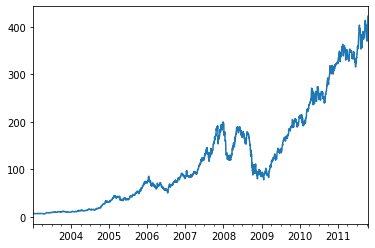

In [242]:
close_px.AAPL.plot()

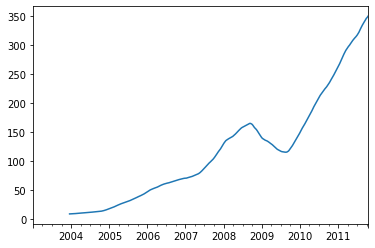

In [243]:
close_px.AAPL.rolling(250).mean().plot()

In [244]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [245]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

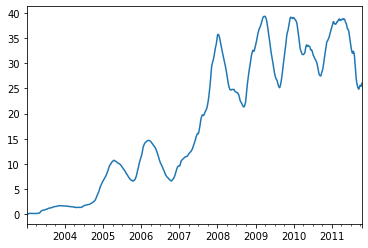

In [246]:
appl_std250.plot()

In [247]:
expanding_mean = appl_std250.expanding().mean()

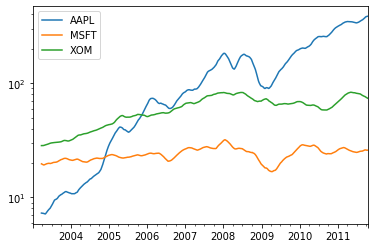

In [248]:
close_px.rolling(60).mean().plot(logy=True)

In [249]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 11.7.1 指数加权函数

In [250]:
aapl_px = close_px.AAPL['2006':'2007']

In [251]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [252]:
ewma60 = aapl_px.ewm(span=30).mean()

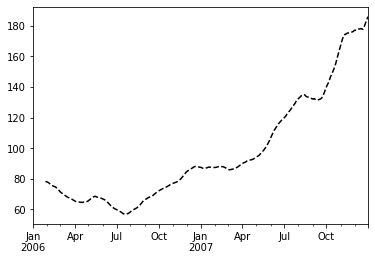

In [253]:
ma60.plot(style='k--', label='Simple MA')

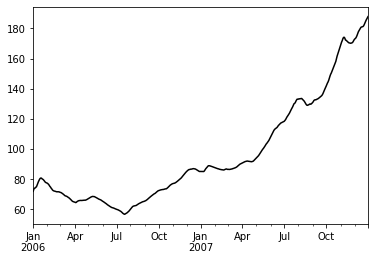

In [254]:
ewma60.plot(style='k-', label='EW MA')

### 11.7.2 二元移动窗口函数

In [256]:
spx_px = close_px_all['SPX']

In [257]:
spx_rets = spx_px.pct_change()

In [258]:
returns = close_px.pct_change()

In [259]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

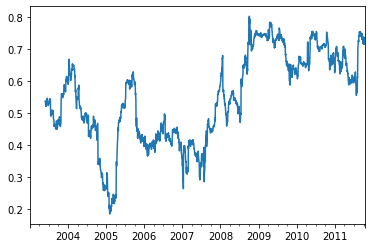

In [260]:
corr.plot()

In [261]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

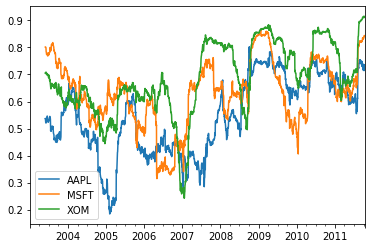

In [262]:
corr.plot()

### 11.7.3 用户自定义的移动窗口函数

In [263]:
from scipy.stats import percentileofscore

In [265]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [266]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


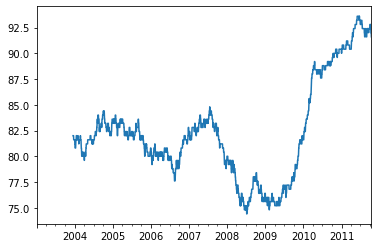

In [267]:
result.plot()